In [115]:
import numpy as np

import matplotlib.pyplot as plt
import pickle

from Roll2Midi_dataset import Roll2MidiDataset

* Video2RollDataset
  * 데이터 EDA를 해서 최소, 최대 건반을 정해놓음
  * 입력 이미지는 `./input_images/training/Bach Prelude and Fugue No.XX B1/frame253.jpg` 형태로 되어있으면 No.XX 의 번호 기준으로 내부적으로 path를 정렬함.
  * 데이터는 5장의 grayscale image(5\*100\*900)과 가운데 frame의 label(88dim vector)이 출력됨.
  * label은 pkl파일로, dict형식. key는 frame 번호, value는 88dim vector, velocity 정보를 담음.
  * 코드 내에서는 velocity를 전부 1로 만들어줌
  * 이미지는 전체 이미지 중 왼쪽, 오른쪽 끝 2개는 제외(연속 5개 쓰겠다는 것)
  * onset뿐만이 아닌 note length도 예측하는듯?
* Roll2MidiDataset
  * midi 폴더 path가 첫번째 파라미터. midi 폴더 내에 50개의 frame단위로 끊은 numpy 객체가 있음. key는 `['key', 'audio', 'midi', 'onset']`로 되어있는데, key는.. 모르겠고 audio는 magnitude를 나타낸 1d arr, midi는 velocity, length가 포함된 50\*88 arr, onset은 50\*88 크기의 onset arr.
  * estimate_Roll p폴더 path가 두번째 파라미터
  * 제공된 코드는 path 정렬할 때 본인 컴퓨터에 맞춰 정렬해버려서 수정함
  * 제공된 예시 데이터셋에 duplicate들이 많아 전부 제거

In [1]:
from Video2Roll_dataset import Video2RollDataset

In [3]:
test_ds = Video2RollDataset("../PianoVMT_prototype/ytdataset/images/", label_root="../PianoVMT_prototype/ytdataset/labels_audeo/")

[('../PianoVMT_prototype/ytdataset/images//training/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4', '../PianoVMT_prototype/ytdataset/labels_audeo//training/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4.pkl'), ('../PianoVMT_prototype/ytdataset/images//training/101_Schumann “Papillons” Paul Barton FEURICH 218 piano.mp4', '../PianoVMT_prototype/ytdataset/labels_audeo//training/101_Schumann “Papillons” Paul Barton FEURICH 218 piano.mp4.pkl'), ('../PianoVMT_prototype/ytdataset/images//training/102_Schumann Romance Op28 No2 (take 2) Paul Barton FEURICH piano.mp4', '../PianoVMT_prototype/ytdataset/labels_audeo//training/102_Schumann Romance Op28 No2 (take 2) Paul Barton FEURICH piano.mp4.pkl'), ('../PianoVMT_prototype/ytdataset/images//training/103_Debussy “Valse romantique” Paul Barton FEURICH piano.mp4', '../PianoVMT_prototype/ytdataset/labels_audeo//training/103_Debussy “Valse romantique” Paul Barton FEURICH piano.mp4.pkl'), ('../Pi

In [ ]:
Video2RollDataset("./Audeo_github/input_images", label_root="./Audeo_github/labels")

In [2]:
ds = Video2RollDataset("./Audeo_github/input_images", label_root="./Audeo_github/labels")

[('./Audeo_github/input_images/training/Bach Prelude and Fugue No.1 B1', './Audeo_github/labels/training/Bach Prelude and Fugue No.1 B1.pkl')]
[('./Audeo_github/input_images/testing/Bach Prelude and Fugue No.1 B2', './Audeo_github/labels/testing/Bach Prelude and Fugue No.1 B2.pkl')]
number of all zero label in training: 1
number of all zero label in testing: 2
length of training data: 1
length of testing data: 1


In [3]:
ds[0][1].shape

torch.Size([85])

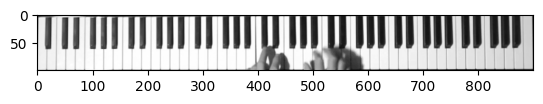

In [50]:
plt.imshow(ds[0][0][0].cpu().detach().numpy(), cmap="gray")

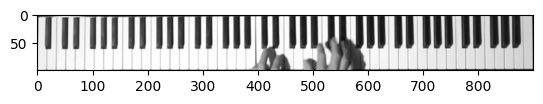

In [51]:
plt.imshow(ds[0][0][1].cpu().detach().numpy(), cmap="gray")

In [52]:
ds[0]

(tensor([[[0.1216, 0.1216, 0.1255,  ..., 0.0706, 0.0627, 0.0588],
          [0.1255, 0.1294, 0.1294,  ..., 0.2039, 0.1412, 0.0863],
          [0.1490, 0.1529, 0.1529,  ..., 0.4980, 0.3333, 0.1608],
          ...,
          [0.4667, 0.8314, 0.9373,  ..., 0.7333, 0.6941, 0.5098],
          [0.4235, 0.7843, 0.9176,  ..., 0.3765, 0.3490, 0.2471],
          [0.3216, 0.6235, 0.7725,  ..., 0.1255, 0.1098, 0.0745]],
 
         [[0.1216, 0.1216, 0.1255,  ..., 0.0706, 0.0627, 0.0627],
          [0.1255, 0.1294, 0.1294,  ..., 0.2000, 0.1373, 0.0863],
          [0.1490, 0.1529, 0.1529,  ..., 0.4980, 0.3333, 0.1569],
          ...,
          [0.4706, 0.8353, 0.9412,  ..., 0.7333, 0.6941, 0.5098],
          [0.4235, 0.7843, 0.9176,  ..., 0.3765, 0.3490, 0.2510],
          [0.3137, 0.6275, 0.7725,  ..., 0.1255, 0.1059, 0.0745]],
 
         [[0.1216, 0.1216, 0.1255,  ..., 0.0667, 0.0627, 0.0588],
          [0.1255, 0.1294, 0.1294,  ..., 0.1961, 0.1412, 0.0902],
          [0.1490, 0.1529, 0.1529,  ...,

In [53]:
ds[0][1].shape

torch.Size([51])

In [54]:
roll_input = np.load("Audeo_github/estimate_Roll/training/Bach Prelude and Fugue No.1 B1/253-303.npz")

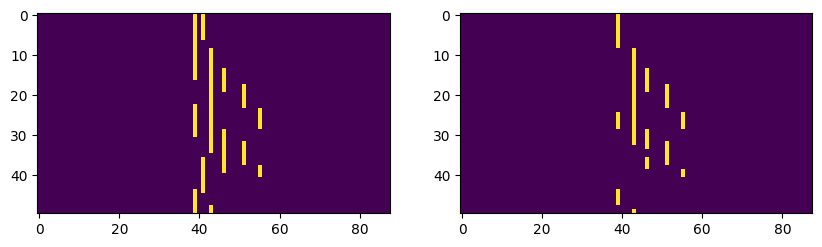

In [55]:
plt.figure(figsize=(10, 50))
plt.subplot(1, 2, 1)
plt.imshow(roll_input['roll'])

plt.subplot(1, 2, 2)
plt.imshow(roll_input['logit']>0.4)

In [117]:
with open("./Audeo_github/labels/training/Bach Prelude and Fugue No.1 B1.pkl", "rb") as f:
    label_input = pickle.load(f)

In [263]:
label_input

{253: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 254: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 255: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,

In [57]:
np_list = []
for k, v in label_input.items():
    np_list.append(v)

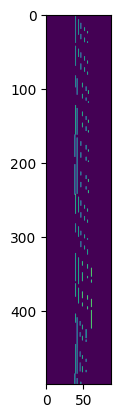

In [58]:
plt.imshow(np.stack(np_list)[:500][:])

In [59]:
from Roll2Midi_dataset import Roll2MidiDataset

In [60]:
ds = Roll2MidiDataset(path="./Audeo_github", est_roll_path="./Audeo_github/estimate_Roll/")


./Audeo_github/midi/
['./Audeo_github/midi/training/Bach Prelude and Fugue No.1 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.2 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.3 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.4 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.5 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.6 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.7 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.8 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.9 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.10 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.11 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.12 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.13 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.14 B1', './Audeo_github/midi/training/Bach Prelude and Fugue No.15 B1', './Audeo_github/midi/traini

have the same files of training gt and est roll: True
101 101
have the same files of training gt and est roll: True
261 261
have the same files of training gt and est roll: True
92 92
have the same files of training gt and est roll: True
111 111
have the same files of training gt and est roll: True
164 164
have the same files of training gt and est roll: True
285 285
have the same files of training gt and est roll: True
81 81
have the same files of training gt and est roll: True
108 108
have the same files of training gt and est roll: True
71 71
have the same files of training gt and est roll: True
236 236
have the same files of training gt and est roll: True
109 109
have the same files of training gt and est roll: True
144 144
have the same files of training gt and est roll: True
97 97
have the same files of training gt and est roll: True
121 121
have the same files of training gt and est roll: True
106 106
have the same files of training gt and est roll: True
138 138
have the same fi

In [61]:
ds[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0'),
 tensor([[[4.6347e-03, 5.2810e-03, 6.0059e-03,  ..., 1.9118e-04,
           1.1402e-04, 1.2520e-04],
          [1.3078e-04, 1.4794e-04, 2.0750e-04,  ..., 2.0409e-05,
           1.2633e-05, 1.0913e-05],
          [3.2707e-03, 3.5294e-03, 3.5242e-03,  ..., 1.8357e-03,
           5.1366e-03, 5.8166e-03],
          ...,
          [8.3605e-03, 1.1157e-02, 9.2508e-03,  ..., 2.1372e-04,
           1.0776e-04, 1.1184e-04],
          [1.5231e-04, 1.3732e-04, 1.8450e-04,  ..., 4.0340e-06,
           1.8774e-06, 2.3534e-06],
          [1.2871e-04, 1.1845e-04, 1.1749e-04,  ..., 7.8572e-05,
           2.6098e-05, 2.3895e-05]]], device='cuda:0'))

In [62]:
import os

In [63]:
len(os.listdir("./Audeo_github/midi/training/Bach Prelude and Fugue No.1 B1/"))

124

In [64]:
len(os.listdir("./Audeo_github/estimate_Roll/training/Bach Prelude and Fugue No.1 B1/"))

124

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np_arr2 =np.load("./Audeo_github/midi/training/Bach Prelude and Fugue No.1 B1/1803-1853.npz")

In [ ]:
list(np_arr.keys())

['key', 'audio', 'midi', 'onset']

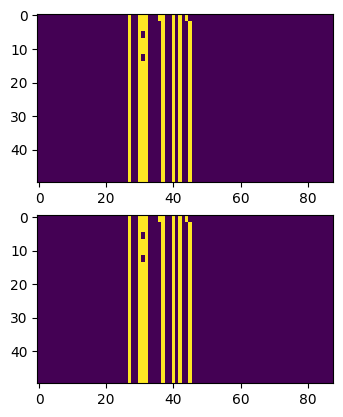

In [ ]:
plt.subplot(2, 1, 1)
plt.imshow(np_arr['key'])
plt.subplot(2, 1, 2)
plt.imshow(np_arr2['key'])

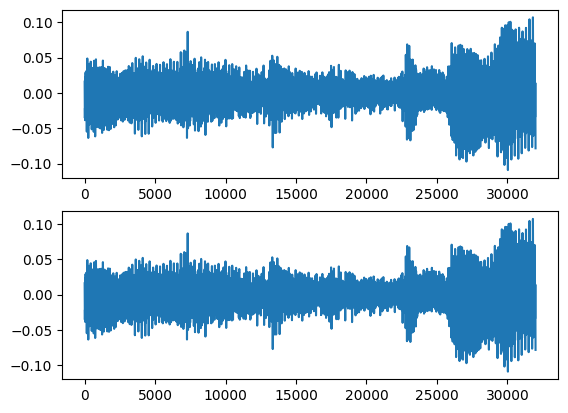

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(np_arr['audio'])
plt.subplot(2, 1, 2)
plt.plot(np_arr2['audio'])

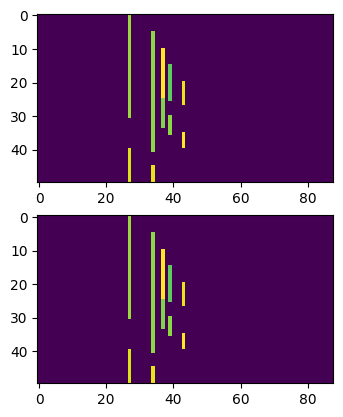

In [ ]:
plt.subplot(2, 1, 1)
plt.imshow(np_arr['midi'])
plt.subplot(2, 1, 2)
plt.imshow(np_arr2['midi'])

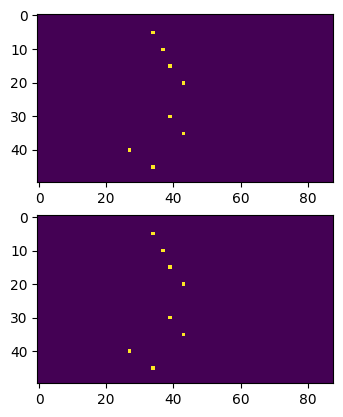

In [ ]:
plt.subplot(2, 1, 1)
plt.imshow(np_arr['onset'])
plt.subplot(2, 1, 2)
plt.imshow(np_arr2['onset'])

-----------

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle


import mido
from mido import MidiFile
from copy import deepcopy

In [80]:
# midi_path = '../PianoVMT_prototype/PianoYT/pianoyt_MIDI/'
# image_path = '../PianoVMT_prototype/ytdataset/images/training/'
# save_path = '../PianoVMT_prototype/ytdataset/labels_audeo/training/'

midi_path = '../PianoVMT_prototype/PianoYT/pianoyt_MIDI/'
image_path = '../PianoVMT_prototype/ytdataset/images/testing/'
save_path = '../PianoVMT_prototype/ytdataset/labels_audeo/testing/'

# midi_path = '../PianoVMT_prototype/MIDItest/miditest_MIDI/'
# image_path = '../PianoVMT_prototype/miditestdataset/images/testing/'
# save_path = '../PianoVMT_prototype/miditestdataset/labels_audeo/testing/'

img_dir_list = sorted(os.listdir(image_path))
img_dir_list = [os.path.join(image_path, filename) for filename in img_dir_list]

In [81]:
fps = 25
A1 = 21

os.makedirs(save_path, exist_ok=True)

for filename in tqdm(img_dir_list):
    img_len = len(os.listdir(filename))
    filename_withoutdir = filename.split("/")[-1]
    
    # pianoyt
    img_id = filename_withoutdir.split("_")[0]
    mid = MidiFile(os.path.join(midi_path, f'audio_{img_id}.0.midi'))
    
    #miditest
    # img_id = filename_withoutdir.split(".")[0]
    # mid = MidiFile(os.path.join(midi_path, f'{img_id}.mid'))
    
    bpm = mido.tempo2bpm(mid.tracks[0][0].tempo)
    bps = bpm / 60.0
    sec_per_tick = mid.ticks_per_beat * bps

    midi_tracks = mid.tracks[1]
    
    np_roll = np.zeros((img_len, 88))
    
    time_sum = 0
    
    for msg in midi_tracks:
        if hasattr(msg, "note"):
            time_sum += msg.time
            msg.time = time_sum
    
    for msg in midi_tracks:
        if hasattr(msg, "note"):
            msg.note -= A1
            msg.time = int((msg.time / sec_per_tick) * fps)
            
    processed_midi = []
    idx_start, idx_end = 0, 0
    for msg in midi_tracks:
        if hasattr(msg, "note"):
            if msg.velocity != 0:
                processed_midi.append({"note": msg.note, "velocity": msg.velocity, "start": msg.time, "end": -1})
            else:
                is_note_end = False
                for midi_line in processed_midi:
                    if midi_line['note'] == msg.note and midi_line['end'] == -1:
                        midi_line['end'] = msg.time
                        is_note_end = True
                        break
                if not is_note_end:
                    raise Exception
                    
    midi_dict = {}
    
    for i in range(1, img_len+1):
        midi_dict[i] = np.zeros(88)
        
    for midi_line in processed_midi:
        for frame in range(midi_line['start'], midi_line['end']):
            np_midi_line = np.zeros(88)
            np_midi_line[midi_line['note']] = midi_line['velocity']
            midi_dict[frame] += np_midi_line
    
    with open(os.path.join(save_path, filename_withoutdir + ".pkl"), "wb") as f:
        pickle.dump(midi_dict, f)

100%|██████████| 6/6 [00:02<00:00,  2.36it/s]


In [163]:
test_midi_array = []
for k, v in midi_dict.items():
    test_midi_array.append(v)

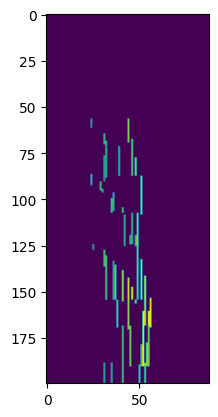

In [167]:
plt.imshow(test_midi_array[200:400])

In [135]:
processed_midi[-1]

{'note': 39, 'velocity': 38, 'start': 4847, 'end': 4951}

In [90]:
for msg in midi_tracks:
    if hasattr(msg, "note"):
        msg.note -= A1
        msg.time = int((msg.time / sec_per_tick) * fps)

In [92]:
for msg in midi_tracks:
    if hasattr(msg, "note"):
        print(msg)

note_on channel=0 note=24 velocity=39 time=257
note_on channel=0 note=44 velocity=58 time=0
note_on channel=0 note=24 velocity=0 time=4
note_on channel=0 note=31 velocity=48 time=3
note_on channel=0 note=46 velocity=56 time=3
note_on channel=0 note=32 velocity=46 time=0
note_on channel=0 note=44 velocity=0 time=0
note_on channel=0 note=31 velocity=0 time=1
note_on channel=0 note=39 velocity=48 time=0
note_on channel=0 note=31 velocity=41 time=4
note_on channel=0 note=48 velocity=64 time=0
note_on channel=0 note=24 velocity=48 time=8
note_on channel=0 note=51 velocity=64 time=0
note_on channel=0 note=39 velocity=0 time=0
note_on channel=0 note=46 velocity=0 time=0
note_on channel=0 note=48 velocity=0 time=0
note_on channel=0 note=32 velocity=0 time=0
note_on channel=0 note=29 velocity=48 time=2
note_on channel=0 note=31 velocity=0 time=0
note_on channel=0 note=24 velocity=0 time=1
note_on channel=0 note=30 velocity=46 time=1
note_on channel=0 note=29 velocity=0 time=0
note_on channel=0 

In [171]:
dummy_midi_dir = "../PianoVMT_prototype/ytdataset/labels_dummy_midi/train/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano/"

In [174]:
for i in range(50, 5489, 50):
    np.savez(os.path.join(dummy_midi_dir, f"{i-50}-{i}.npz"), np.zeros(1))

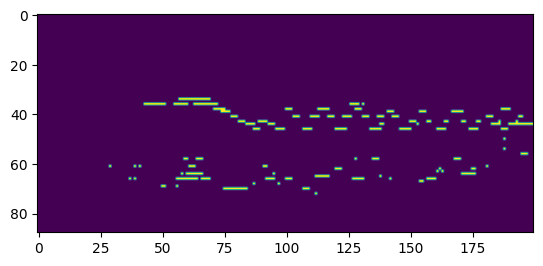

In [89]:
test_roll_gen_path = "./outputs_test/v2r_output/163_Bach Prelude and Fugue No6 Well Tempered Clavier Book 2 with Harmonic Pedal.mp4"
test_midi_gen_list = sorted(os.listdir(test_roll_gen_path), key=lambda x: int(x.split('-')[0]))
test_midi_gen_list = [os.path.join(test_roll_gen_path, midi_gen) for midi_gen in test_midi_gen_list]

midi_roll_cat = []
for midi_gen in test_midi_gen_list:
    midi_roll_cat.append(np.load(midi_gen)['roll'])
    
plt.imshow(np.concatenate(midi_roll_cat, axis=0)[200:400, ::-1].transpose())

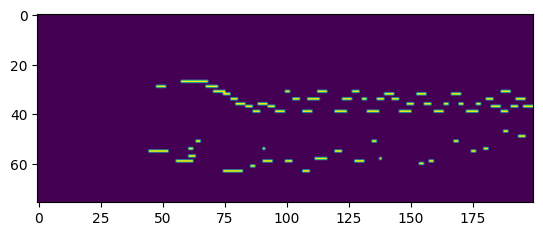

In [90]:
test_midi_gen_path = "./outputs_test/r2m_output/163_Bach Prelude and Fugue No6 Well Tempered Clavier Book 2 with Harmonic Pedal.mp4"
test_midi_gen_list = sorted(os.listdir(test_midi_gen_path), key=lambda x: int(x.split('-')[0]))
test_midi_gen_list = [os.path.join(test_midi_gen_path, midi_gen) for midi_gen in test_midi_gen_list]

midi_gen_cat = []
for midi_gen in test_midi_gen_list:
    midi_gen_cat.append(np.load(midi_gen)['midi'])
    
plt.imshow(np.concatenate(midi_gen_cat, axis=0)[200:400, ::-1].transpose())

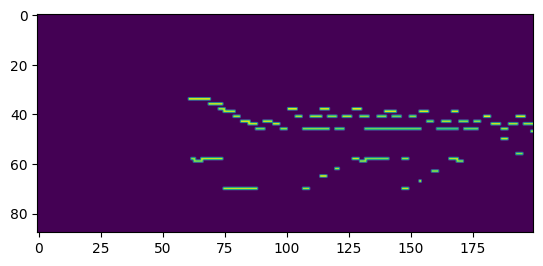

In [92]:
gt = np.load("../PianoVMT_prototype/ytdataset/labels_audeo/testing/163_Bach Prelude and Fugue No6 Well Tempered Clavier Book 2 with Harmonic Pedal.mp4.pkl", allow_pickle=True)

gt_np = []
for k, v in gt.items():
    gt_np.append(v)
    
plt.imshow(np.stack(gt_np)[200:400, ::-1].transpose())

In [102]:
np.stack(gt_np)[200:400, ::-1].transpose().shape

(88, 200)

In [104]:
np.pad(
    np.concatenate(midi_gen_cat, axis=0)[200:400, ::-1].transpose(),
    ((5, 8), (0, 0)), 'constant', constant_values=0).shape

(89, 200)

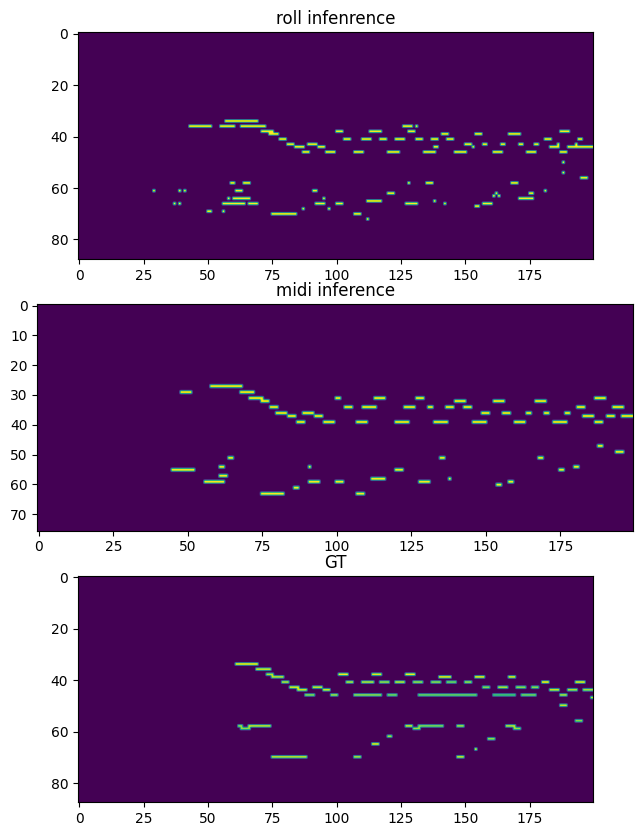

In [99]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
plt.title("roll infenrence")
plt.imshow(np.concatenate(midi_roll_cat, axis=0)[200:400, ::-1].transpose())
plt.subplot(3, 1, 2)
plt.title("midi inference")
plt.imshow(np.concatenate(midi_gen_cat, axis=0)[200:400, ::-1].transpose())
plt.subplot(3, 1, 3)
plt.title("GT")
plt.imshow(np.stack(gt_np)[200:400, ::-1].transpose())

In [ ]:
np.load("./outputs_test/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/")

In [193]:
np.load("./outputs_test/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/0-50.npz")

FileNotFoundError: [Errno 2] No such file or directory: './outputs_test/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/0-50.npz'